# Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("College.csv")

In [3]:
df.sample(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
186,Elmira College,Yes,1457,1045,345,27,50,1109,502,14990,4980,450,550,77,98,21.5,21,7502,64
21,Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
475,Rivier College,Yes,484,386,141,6,28,590,1196,9870,4860,600,1100,59,59,12.2,19,6744,81
767,Winthrop University,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
717,Voorhees College,Yes,1465,1006,188,10,30,703,20,4450,2522,500,1200,43,43,22.9,3,5861,58
347,Mary Washington College,No,4350,2178,756,39,78,2997,736,6490,4942,650,2102,75,80,17.6,30,5358,84
400,Muhlenberg College,Yes,2519,1836,462,30,61,1656,352,16975,4565,600,850,76,86,12.8,39,10888,83
333,Lyndon State College,No,535,502,223,6,20,959,150,7320,4640,500,600,48,65,12.6,15,7114,51
154,Cumberland College,Yes,995,789,398,26,47,1306,122,6230,3526,400,600,42,44,13.0,4,8189,63
383,Montclair State University,No,5220,2128,865,19,53,6411,3186,3648,4834,700,950,82,87,21.5,9,6717,58


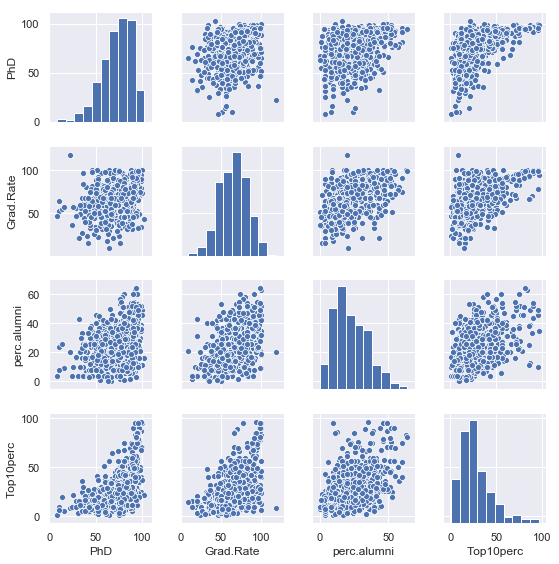

In [4]:
sns.set()
cols = ['PhD', 'Grad.Rate', 'perc.alumni', 'Top10perc']
sns.pairplot(df[cols], height = 2)
plt.show()

1. Grad.Rate = Tingkat kelulusan
2. PhD = Berapa persen yang mempunyai PhD
3. Top10perc = Berapa banyak jumlah mahasiswa baru dengan ranking 10 besar
4. Perc.alumni = Berapa banyak alumni yang mendonasi

C:\Users\16523020\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


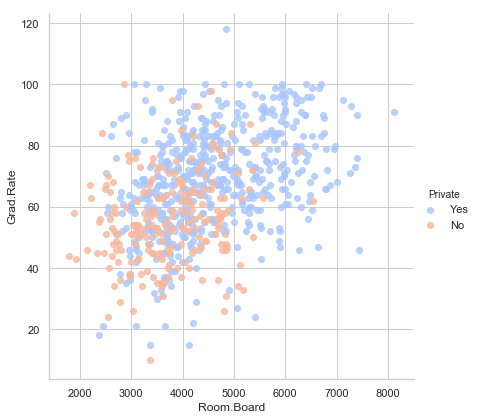

In [5]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

C:\Users\16523020\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


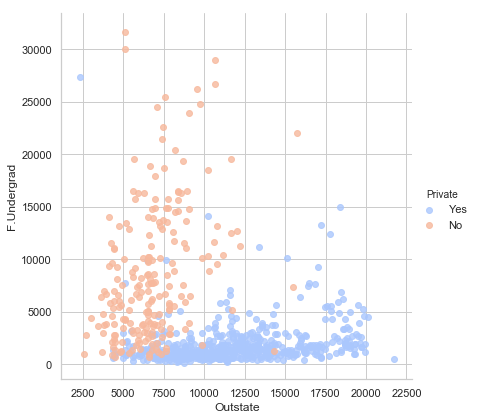

In [6]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

C:\Users\16523020\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


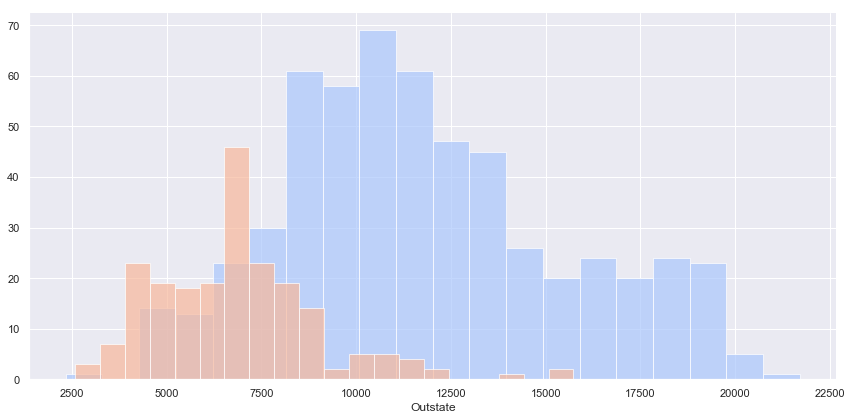

In [7]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

C:\Users\16523020\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


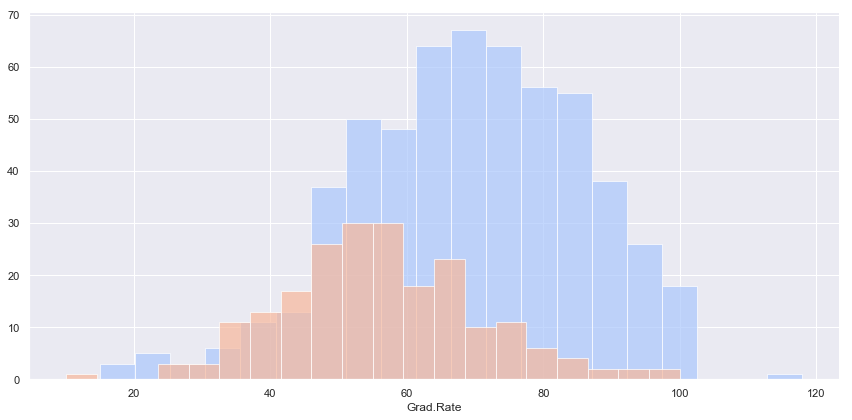

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

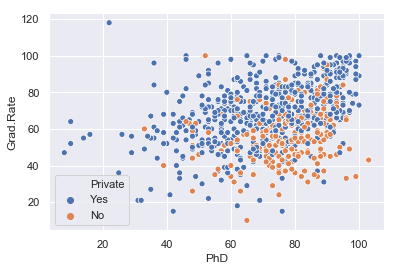

In [9]:
sns.scatterplot(x='PhD', y='Grad.Rate', hue='Private', data=df)

(Text(0.5,0,'Number of Cluster'), Text(0,0.5,'Inertia'))

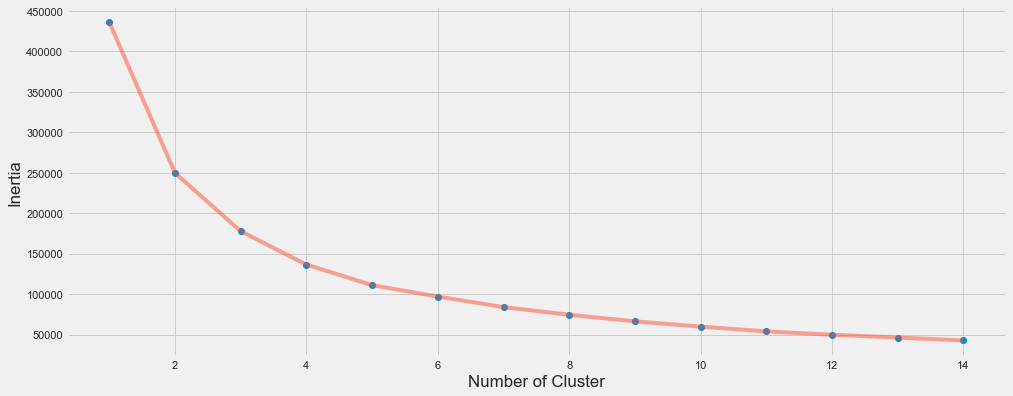

In [10]:
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))

x1 = df[['PhD', 'Grad.Rate']].iloc[:, :].values
inertia = []
for n in range(1, 15):
    algorithm = (KMeans(n_clusters=n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(17, 8))
plt.plot(np.arange(1,15), inertia, 'o')
plt.plot(np.arange(1,15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluster'), plt.ylabel('Inertia')

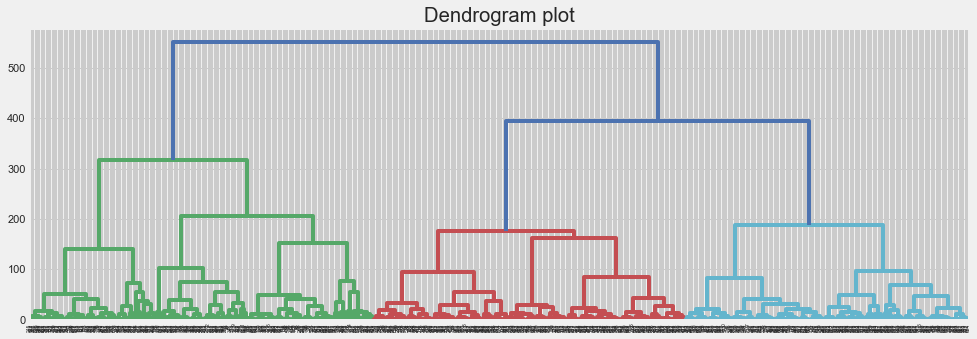

In [11]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(x1,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

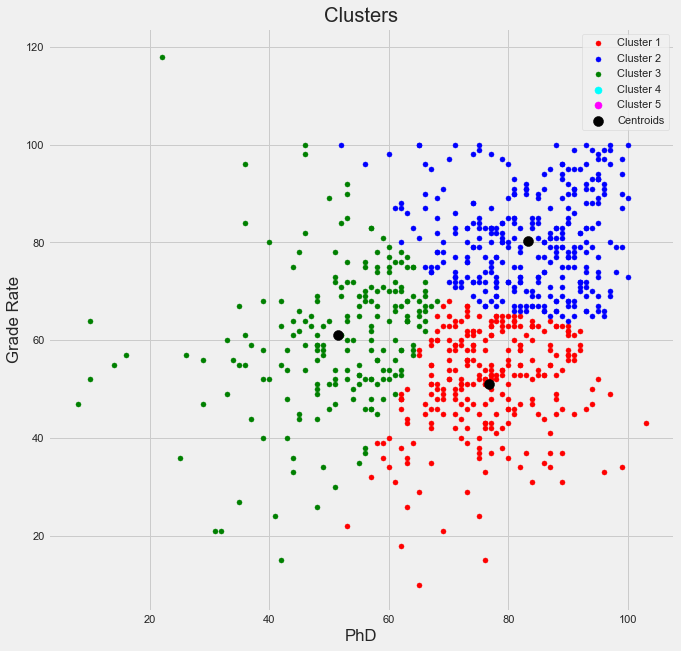

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=1500,n_init=10,random_state=0, algorithm='elkan')
y_kmeans=kmeans.fit_predict(x1)

plt.figure(figsize=(10,10))
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(x1[y_kmeans == 3, 0], x1[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x1[y_kmeans == 4, 0], x1[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PhD')
plt.ylabel('Grade Rate')
plt.legend()
plt.show()

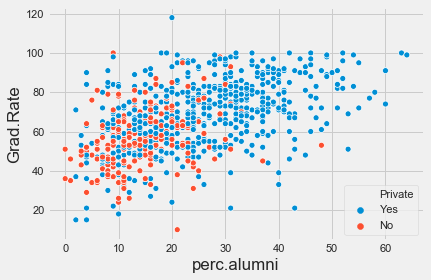

In [13]:
sns.scatterplot(x='perc.alumni', y='Grad.Rate', hue='Private', data=df)

(Text(0.5,0,'Number of Cluster'), Text(0,0.5,'Inertia'))

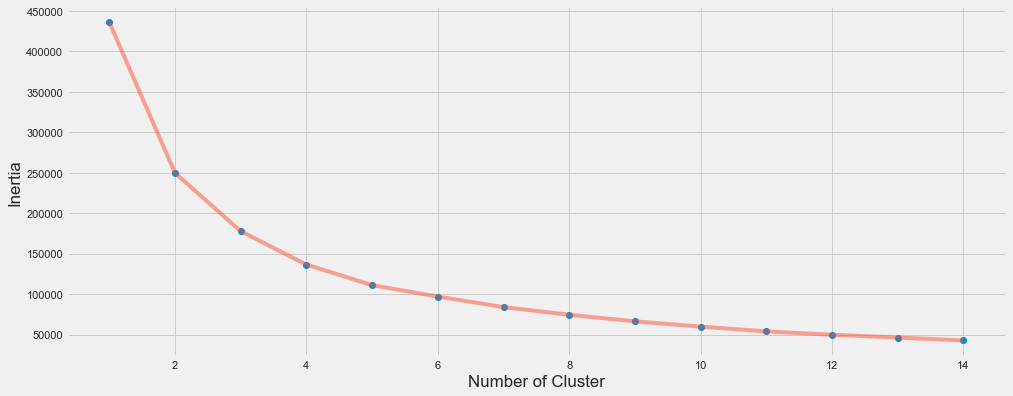

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))

x2 = df[['perc.alumni', 'Grad.Rate']].iloc[:, :].values
inertia = []
for n in range(1, 15):
    algorithm = (KMeans(n_clusters=n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(17, 8))
plt.plot(np.arange(1,15), inertia, 'o')
plt.plot(np.arange(1,15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluster'), plt.ylabel('Inertia')

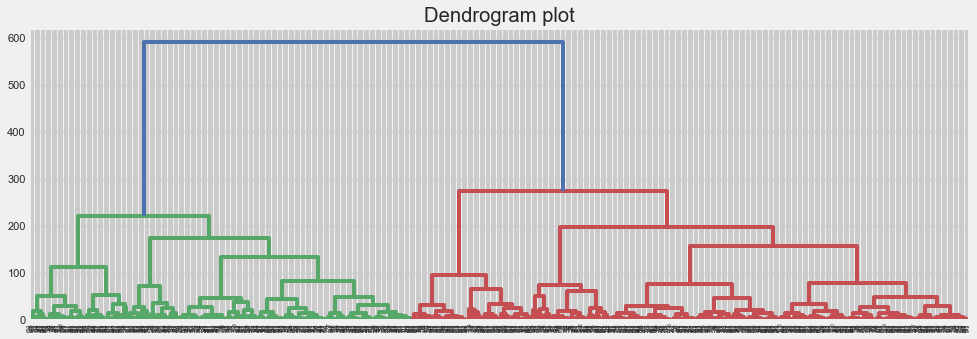

In [15]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(x2,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

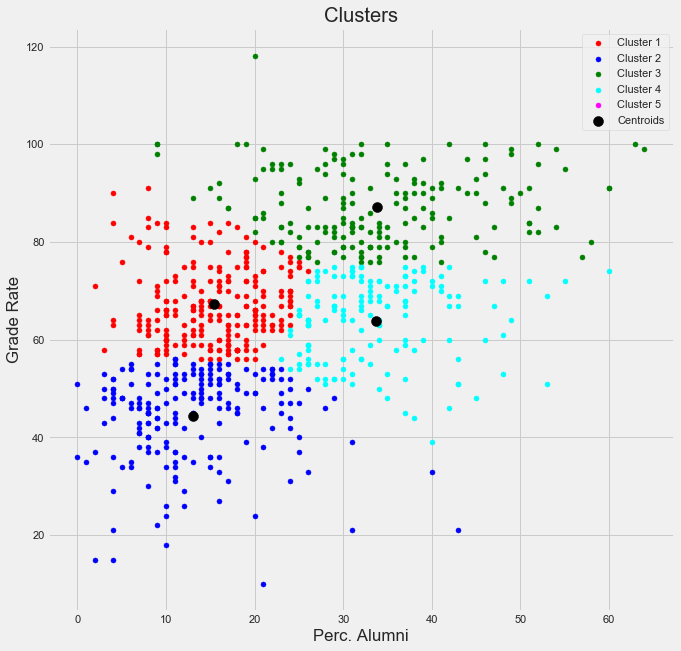

In [16]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=1500,n_init=10,random_state=0, algorithm='elkan')
y_kmeans=kmeans.fit_predict(x2)

plt.figure(figsize=(10,10))
plt.scatter(x2[y_kmeans == 0, 0], x2[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(x2[y_kmeans == 1, 0], x2[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(x2[y_kmeans == 2, 0], x2[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(x2[y_kmeans == 3, 0], x2[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(x2[y_kmeans == 4, 0], x2[y_kmeans == 4, 1], s = 25, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters') 
plt.xlabel('Perc. Alumni')
plt.ylabel('Grade Rate')
plt.legend()
plt.show()

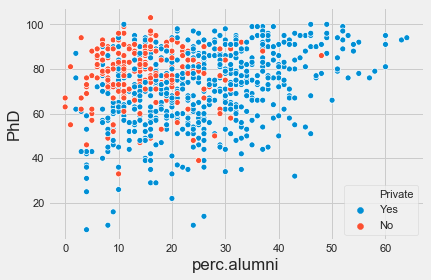

In [17]:
sns.scatterplot(x='perc.alumni', y='PhD', hue='Private', data=df)

(Text(0.5,0,'Number of Cluster'), Text(0,0.5,'Inertia'))

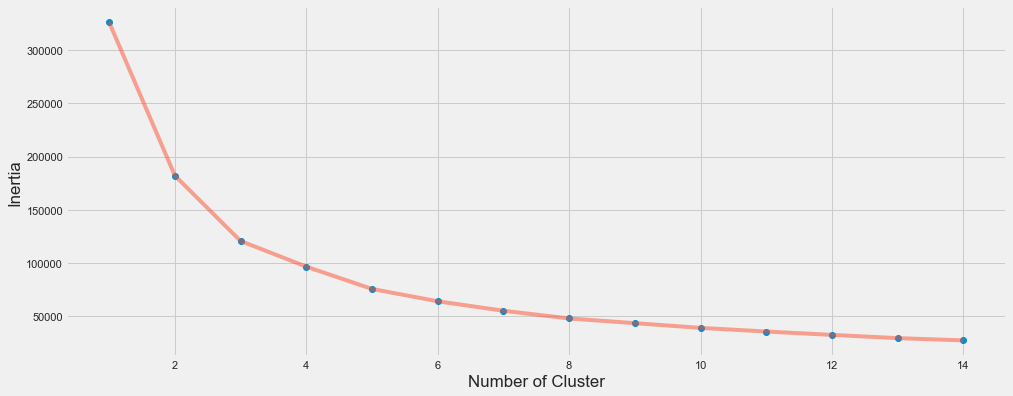

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))

x3 = df[['perc.alumni', 'PhD']].iloc[:, :].values
inertia = []
for n in range(1, 15):
    algorithm = (KMeans(n_clusters=n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x3)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(17, 8))
plt.plot(np.arange(1,15), inertia, 'o')
plt.plot(np.arange(1,15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluster'), plt.ylabel('Inertia')

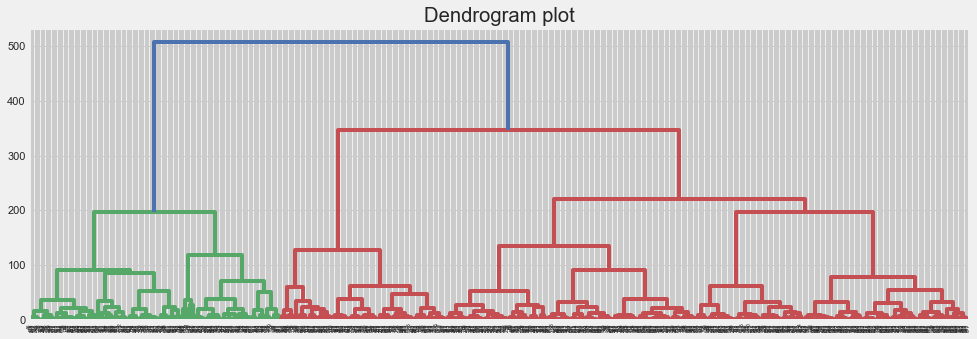

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(x3,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

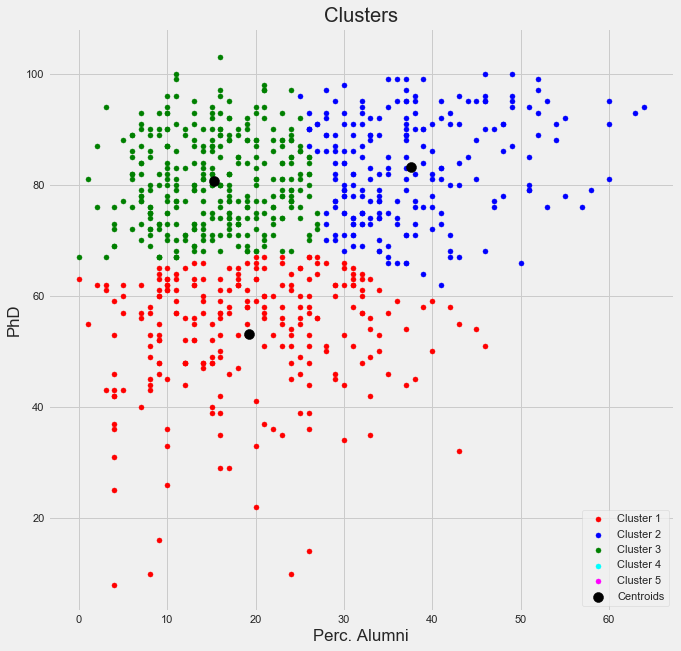

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=1500,n_init=10,random_state=0, algorithm='elkan')
y_kmeans=kmeans.fit_predict(x3)

plt.figure(figsize=(10,10))
plt.scatter(x3[y_kmeans == 0, 0], x3[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(x3[y_kmeans == 1, 0], x3[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(x3[y_kmeans == 2, 0], x3[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(x3[y_kmeans == 3, 0], x3[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(x3[y_kmeans == 4, 0], x3[y_kmeans == 4, 1], s = 25, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Perc. Alumni')
plt.ylabel('PhD')
plt.legend()
plt.show()

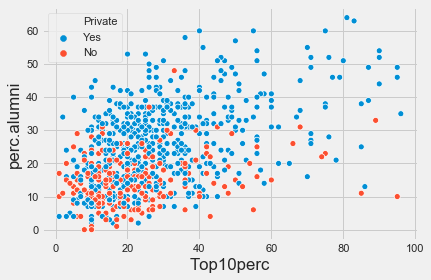

In [21]:
sns.scatterplot(x='Top10perc', y='perc.alumni', hue='Private', data=df)

(Text(0.5,0,'Number of Cluster'), Text(0,0.5,'Inertia'))

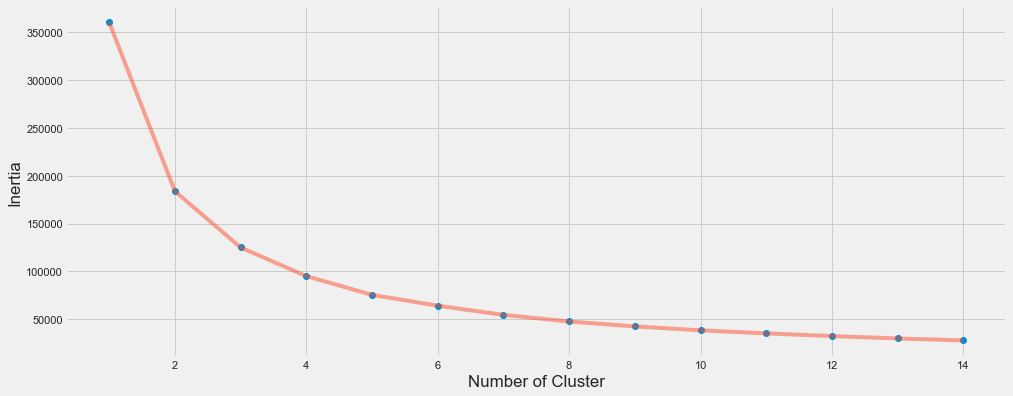

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))

x4 = df[['Top10perc', 'perc.alumni']].iloc[:, :].values
inertia = []
for n in range(1, 15):
    algorithm = (KMeans(n_clusters=n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x4)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(17, 8))
plt.plot(np.arange(1,15), inertia, 'o')
plt.plot(np.arange(1,15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluster'), plt.ylabel('Inertia')

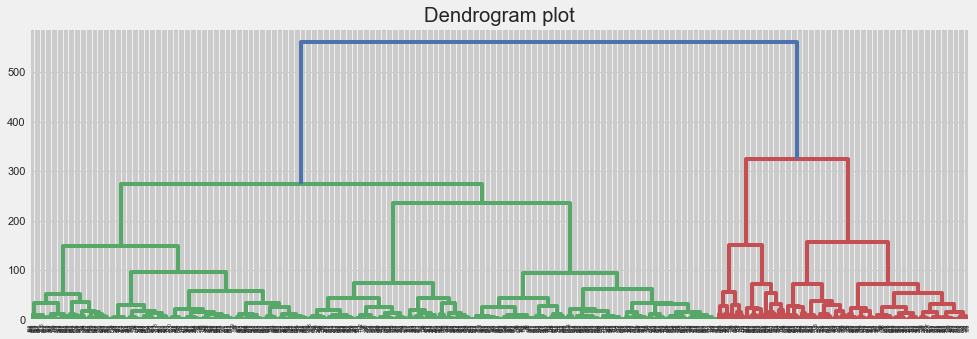

In [23]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(x4,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

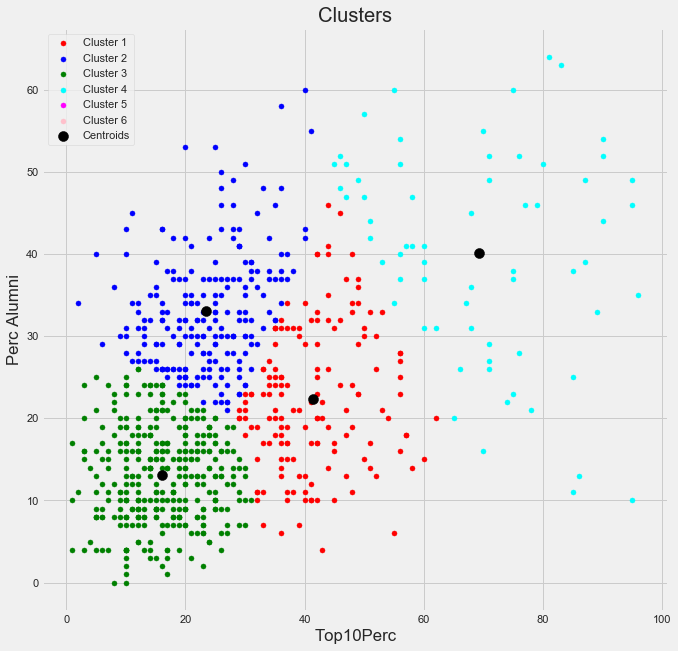

In [25]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=1500,n_init=10,random_state=0, algorithm='elkan')
y_kmeans=kmeans.fit_predict(x4)

plt.figure(figsize=(10,10))
plt.scatter(x4[y_kmeans == 0, 0], x4[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(x4[y_kmeans == 1, 0], x4[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(x4[y_kmeans == 2, 0], x4[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(x4[y_kmeans == 3, 0], x4[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(x4[y_kmeans == 4, 0], x4[y_kmeans == 4, 1], s = 25, c = 'magenta', label = 'Cluster 5')
plt.scatter(x4[y_kmeans == 5, 0], x4[y_kmeans == 5, 1], s = 25, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Top10Perc')
plt.ylabel('Perc Alumni')
plt.legend()
plt.show()

In [ ]:
n 

Dalam menentukan jumlah kluster, kami menggunakan metode elbow berdasarkan jumlah inersia. Metode elbow dilakukan dengan mencari jumlah inersia yang tidak terlalu signifikan antar titik yang disajikan pada gambar di bawah.